In [1]:
import pandas as pd
import numpy as np

# Creation

In [2]:
df = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20250101"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
df

,A,B,C,D,E,F
0,1.0,2025-01-01,1.0,3,test,foo
1,1.0,2025-01-01,1.0,3,train,foo
2,1.0,2025-01-01,1.0,3,test,foo
3,1.0,2025-01-01,1.0,3,train,foo


In [3]:
dates = pd.date_range("20250101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2025-01-01,-1.869410,-1.107287,-0.443624,2.360534
2025-01-02,-1.455233,-1.708932,0.840948,0.819849
2025-01-03,-1.702590,2.292330,1.296625,-0.396250
2025-01-04,-1.116723,0.583604,-0.701220,1.577537
2025-01-05,0.160214,-0.646376,-0.718353,1.271023
2025-01-06,0.766623,-1.543628,0.243037,0.042216


In [4]:
df.sort_values(by="B") # all rows are sorted by B

,A,B,C,D
2025-01-02,-1.455233,-1.708932,0.840948,0.819849
2025-01-06,0.766623,-1.543628,0.243037,0.042216
2025-01-01,-1.869410,-1.107287,-0.443624,2.360534
2025-01-05,0.160214,-0.646376,-0.718353,1.271023
2025-01-04,-1.116723,0.583604,-0.701220,1.577537
2025-01-03,-1.702590,2.292330,1.296625,-0.396250


In [5]:
df["A"]

2025-01-01   -1.869410
2025-01-02   -1.455233
2025-01-03   -1.702590
2025-01-04   -1.116723
2025-01-05    0.160214
2025-01-06    0.766623
Freq: D, Name: A, dtype: float64

In [6]:
df[0:3]

,A,B,C,D
2025-01-01,-1.869410,-1.107287,-0.443624,2.360534
2025-01-02,-1.455233,-1.708932,0.840948,0.819849
2025-01-03,-1.702590,2.292330,1.296625,-0.396250


In [7]:
df["20250101":"20250104"]

,A,B,C,D
2025-01-01,-1.869410,-1.107287,-0.443624,2.360534
2025-01-02,-1.455233,-1.708932,0.840948,0.819849
2025-01-03,-1.702590,2.292330,1.296625,-0.396250
2025-01-04,-1.116723,0.583604,-0.701220,1.577537


In [8]:
df.loc[dates[0]]

A   -1.869410
B   -1.107287
C   -0.443624
D    2.360534
Name: 2025-01-01 00:00:00, dtype: float64

In [9]:
df.loc[:, ["A", "B"]]

,A,B
2025-01-01,-1.869410,-1.107287
2025-01-02,-1.455233,-1.708932
2025-01-03,-1.702590,2.292330
2025-01-04,-1.116723,0.583604
2025-01-05,0.160214,-0.646376
2025-01-06,0.766623,-1.543628


In [10]:
df.loc["20250102":"20250104", ["A", "B"]]

,A,B
2025-01-02,-1.455233,-1.708932
2025-01-03,-1.702590,2.292330
2025-01-04,-1.116723,0.583604


In [11]:
df.loc[dates[0], "A"]

np.float64(-1.8694095971280638)

In [12]:
# if scaler, should use at
df.at[dates[0], "A"]

np.float64(-1.8694095971280638)

# use iloc to select by position

In [13]:
df.iloc[3]

A   -1.116723
B    0.583604
C   -0.701220
D    1.577537
Name: 2025-01-04 00:00:00, dtype: float64

In [14]:
df.iloc[3:5, 0:2]

,A,B
2025-01-04,-1.116723,0.583604
2025-01-05,0.160214,-0.646376


In [15]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2025-01-02,-1.455233,0.840948
2025-01-03,-1.702590,1.296625
2025-01-05,0.160214,-0.718353


In [16]:
df.iloc[1:3]

,A,B,C,D
2025-01-02,-1.455233,-1.708932,0.840948,0.819849
2025-01-03,-1.702590,2.292330,1.296625,-0.396250


In [17]:
df.iloc[:, 1:3]

,B,C
2025-01-01,-1.107287,-0.443624
2025-01-02,-1.708932,0.840948
2025-01-03,2.292330,1.296625
2025-01-04,0.583604,-0.701220
2025-01-05,-0.646376,-0.718353
2025-01-06,-1.543628,0.243037


In [18]:
df.iloc[1, 1]

np.float64(-1.708931694713861)

# Use iat for fater scalar

In [19]:
df.iat[1, 1]

np.float64(-1.708931694713861)

# Boolean indexing

In [20]:
df[df["A"] > 0] # Select all row where df.A is greater than 0

,A,B,C,D
2025-01-05,0.160214,-0.646376,-0.718353,1.271023
2025-01-06,0.766623,-1.543628,0.243037,0.042216


In [21]:
df[ df > 0]

,A,B,C,D
2025-01-01,NaN,NaN,NaN,2.360534
2025-01-02,NaN,NaN,0.840948,0.819849
2025-01-03,NaN,2.292330,1.296625,NaN
2025-01-04,NaN,0.583604,NaN,1.577537
2025-01-05,0.160214,NaN,NaN,1.271023
2025-01-06,0.766623,NaN,0.243037,0.042216


In [22]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2025-01-01,-1.869410,-1.107287,-0.443624,2.360534,one
2025-01-02,-1.455233,-1.708932,0.840948,0.819849,one
2025-01-03,-1.702590,2.292330,1.296625,-0.396250,two
2025-01-04,-1.116723,0.583604,-0.701220,1.577537,three
2025-01-05,0.160214,-0.646376,-0.718353,1.271023,four
2025-01-06,0.766623,-1.543628,0.243037,0.042216,three


In [23]:
df2[df2["E"].isin(["two", "four"])] # Select column E where rows have "two" and "four"

,A,B,C,D,E
2025-01-03,-1.702590,2.292330,1.296625,-0.396250,two
2025-01-05,0.160214,-0.646376,-0.718353,1.271023,four


# Setting

In [24]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20250102", periods=6))
s1

2025-01-02    1
2025-01-03    2
2025-01-04    3
2025-01-05    4
2025-01-06    5
2025-01-07    6
Freq: D, dtype: int64

In [25]:
df.at[dates[0], "A"] = 0

In [26]:
df.iat[0, 1] = 0

In [27]:
df.loc[:, "D"] = np.array([5] * len(df))

In [28]:
df

,A,B,C,D
2025-01-01,0.000000,0.000000,-0.443624,5.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0
2025-01-03,-1.702590,2.292330,1.296625,5.0
2025-01-04,-1.116723,0.583604,-0.701220,5.0
2025-01-05,0.160214,-0.646376,-0.718353,5.0
2025-01-06,0.766623,-1.543628,0.243037,5.0


In [29]:
df2 = df.copy()
df2[df2 > 0] = -df2 # turn all values negative
df2

,A,B,C,D
2025-01-01,0.000000,0.000000,-0.443624,-5.0
2025-01-02,-1.455233,-1.708932,-0.840948,-5.0
2025-01-03,-1.702590,-2.292330,-1.296625,-5.0
2025-01-04,-1.116723,-0.583604,-0.701220,-5.0
2025-01-05,-0.160214,-0.646376,-0.718353,-5.0
2025-01-06,-0.766623,-1.543628,-0.243037,-5.0


In [30]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1 # select the first 2 rows on column "E"
df1

,A,B,C,D,E
2025-01-01,0.000000,0.000000,-0.443624,5.0,1.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0,1.0
2025-01-03,-1.702590,2.292330,1.296625,5.0,NaN
2025-01-04,-1.116723,0.583604,-0.701220,5.0,NaN


In [31]:
df1.dropna(how="any") # not inplace

,A,B,C,D,E
2025-01-01,0.000000,0.000000,-0.443624,5.0,1.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0,1.0


In [32]:
df1.fillna(value=5)

,A,B,C,D,E
2025-01-01,0.000000,0.000000,-0.443624,5.0,1.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0,1.0
2025-01-03,-1.702590,2.292330,1.296625,5.0,5.0
2025-01-04,-1.116723,0.583604,-0.701220,5.0,5.0


In [33]:
pd.isna(df1) # returns the same shape with boolean values

,A,B,C,D,E
2025-01-01,False,False,False,False,False
2025-01-02,False,False,False,False,False
2025-01-03,False,False,False,False,True
2025-01-04,False,False,False,False,True


# Operations

In [34]:
df.mean()

A   -0.557952
B   -0.170500
C    0.086236
D    5.000000
dtype: float64

In [35]:
df.mean(axis=1) # calculate the mean for each column, rarely used, unless change to pivot table

2025-01-01    1.139094
2025-01-02    0.669196
2025-01-03    1.721591
2025-01-04    0.941415
2025-01-05    0.948871
2025-01-06    1.116508
Freq: D, dtype: float64

In [36]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2025-01-01    NaN
2025-01-02    NaN
2025-01-03    1.0
2025-01-04    3.0
2025-01-05    5.0
2025-01-06    NaN
Freq: D, dtype: float64

In [37]:
df.sub(s, axis="index")

,A,B,C,D
2025-01-01,NaN,NaN,NaN,NaN
2025-01-02,NaN,NaN,NaN,NaN
2025-01-03,-2.702590,1.292330,0.296625,4.0
2025-01-04,-4.116723,-2.416396,-3.701220,2.0
2025-01-05,-4.839786,-5.646376,-5.718353,0.0
2025-01-06,NaN,NaN,NaN,NaN


In [38]:
df

,A,B,C,D
2025-01-01,0.000000,0.000000,-0.443624,5.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0
2025-01-03,-1.702590,2.292330,1.296625,5.0
2025-01-04,-1.116723,0.583604,-0.701220,5.0
2025-01-05,0.160214,-0.646376,-0.718353,5.0
2025-01-06,0.766623,-1.543628,0.243037,5.0


# agg vs transform vs apply
- agg - returns a **reduced** version of the data - one result per group.
- transform - returns a **full-sized** version of the data, with the same shape and index as the original
- apply - most flexible and can return a reduced, full-sized, or entirely different version

In [39]:
df_x = pd.DataFrame({
    "Team": ["A", "A", "B", "B", "B", "C"],
    "Score": [10, 15, 20, 22, 18, 5],
    "Assists": [2, 5, 8, 6, 7, 1]
})
df_x

,Team,Score,Assists
0,A,10,2
1,A,15,5
2,B,20,8
3,B,22,6
4,B,18,7
5,C,5,1


#### agg() (or aggregation())
- The agg() method is used to perform one or more aggregation functions on grouped data. It reduces the data by computing a summary statistic for each group.
- What it does: summarizes each group into a single value (or one value per function).
- Output Shape: A new DataFrame or Series with an index based on the group names. The size is equal to the number of groups.
- Best for: Calculating summary statistics like sum(), mean(), count(), min(), max(), etc., for each group.

In [40]:
# total score for each team
team_sum = df_x.groupby("Team")["Score"].agg("sum")
team_sum

Team
A    25
B    60
C     5
Name: Score, dtype: int64

#### transform()
- The transform() method performs a group-specific computation and then broadcasts the result back to each row of the original DataFrame. It transforms each value in the context of its group.
- What it does: Returns a Series or DataFrame with the same index and shape as the original. Each row's value is the result of the group-wise calculation.
- Output Shape: Exactly the same shape and index as the object it was called on.
- Best For: Feature engineering, such as calculating a group-wise Z score, or filling missing values with the group's mean

In [41]:
# Get the mean score for each team and display it new column for that corresponding teacm
df_x["Team_Avg_Score"] = df_x.groupby("Team")["Score"].transform("mean") 
df_x
# Notice how transform() returned a Series with 6 items, perfectly aligning with the original DataFrame's index.
# This makes it ideal for creating new columns based on group properties.

,Team,Score,Assists,Team_Avg_Score
0,A,10,2,12.5
1,A,15,5,12.5
2,B,20,8,20.0
3,B,22,6,20.0
4,B,18,7,20.0
5,C,5,1,5.0


#### apply()
- The apply() method is the most flexible and general-purpose of the three. It applies a function to each group as a whole (as a DataFrame or Series) and then peices the results back together.
- What it does: can behave like agg() or transform(), or perform much more complex operations that don't fit into the other two categories.
- Output Shape: Flexible. The shape of the output depends entirely on what the applied function returns. It can be a scalar, a Series, or a DataFrame.
- Best for: Complex, custom functions that need to operate on the entire group's data at once. It's powerful but offen slower than agg() or transform().

In [42]:
# Find the range (max- min) of scores for each team.
score_range = df_x.groupby("Team")["Score"].apply(lambda x: x.max() - x.min())
score_range

Team
A    5
B    4
C    0
Name: Score, dtype: int64

In [43]:
# Create a new column that ranks players by score, but the ranking is within their team. (difficult with agg() or transform())
df_x["Team_Rank"] = df_x.groupby("Team").apply(
    lambda x: x["Score"].rank(ascending=False)
).reset_index(level=0, drop=True) # Dropping multi-index for clean assignment
df_x

C:\Users\thotc\AppData\Local\Temp\ipykernel_44908\1905186215.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_x["Team_Rank"] = df_x.groupby("Team").apply(


,Team,Score,Assists,Team_Avg_Score,Team_Rank
0,A,10,2,12.5,2.0
1,A,15,5,12.5,1.0
2,B,20,8,20.0,2.0
3,B,22,6,20.0,1.0
4,B,18,7,20.0,3.0
5,C,5,1,5.0,1.0


In [44]:
df.agg(lambda x: np.mean(x) * 5.6) # default axis = 0

A    -3.124529
B    -0.954801
C     0.482919
D    28.000000
dtype: float64

In [45]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2025-01-01,0.000000,0.000000,-44.894745,506.0
2025-01-02,-147.269590,-172.943888,85.103923,506.0
2025-01-03,-172.302143,231.983805,131.218469,506.0
2025-01-04,-113.012351,59.060771,-70.963460,506.0
2025-01-05,16.213665,-65.413201,-72.697337,506.0
2025-01-06,77.582210,-156.215183,24.595369,506.0


In [46]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    0
2    2
3    2
4    2
5    1
6    0
7    6
8    4
9    6
dtype: int32

In [47]:
s.value_counts() # Count frequency of unique values - good for distribuation of categorial or discrete data

2    3
4    2
0    2
6    2
1    1
Name: count, dtype: int64

In [48]:
s.count() # Counts each non-null (non-missing) values

np.int64(10)

In [49]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
- Concat - Combine pandas object together row-wise
- Join - enable SQL-style join along specific columns.

In [50]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.662501,-0.655058,0.696130,1.783274
1,-0.917571,-0.822329,0.744681,0.649301
2,0.163473,1.465481,-2.173448,1.073313
3,0.509493,-1.372176,0.489859,-0.713357
4,-0.954961,2.729879,-0.691485,-0.818411
5,-0.351394,-1.543398,2.894399,-1.663044
6,-1.210106,-0.049222,-1.825774,-0.006044
7,-0.151215,-0.968849,-0.586476,-0.443769
8,-0.738023,0.563990,2.108870,2.367079
9,1.945799,-0.974139,-0.875188,0.289428


In [51]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.662501,-0.655058,0.696130,1.783274
1,-0.917571,-0.822329,0.744681,0.649301
2,0.163473,1.465481,-2.173448,1.073313
3,0.509493,-1.372176,0.489859,-0.713357
4,-0.954961,2.729879,-0.691485,-0.818411
5,-0.351394,-1.543398,2.894399,-1.663044
6,-1.210106,-0.049222,-1.825774,-0.006044
7,-0.151215,-0.968849,-0.586476,-0.443769
8,-0.738023,0.563990,2.108870,2.367079
9,1.945799,-0.974139,-0.875188,0.289428


In [52]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [53]:
right

,key,rval
0,foo,4
1,foo,5


In [54]:
pd.merge(left, right, on="key") # key are not unique,

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [55]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [56]:
right

,key,rval
0,foo,4
1,bar,5


In [57]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
- By "group by" we are referring to a process involving one or more of the following steps:
- Splitting the data into groups based on some criteria
- Applying: a function to each group independently
- Combining: the results into a data structure 

In [58]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.485140,-0.890694
1,bar,one,0.695854,0.209452
2,foo,two,0.912655,-0.469555
3,bar,three,1.049669,-0.719871
4,foo,two,-0.401905,-2.139784
5,bar,two,0.024316,-0.052321
6,foo,one,-0.430833,0.090937
7,foo,three,0.708538,0.317380


In [59]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,1.769839,-0.562741
foo,2.273595,-3.091715


In [60]:
df.groupby(["A", "B"]).sum() # multiple index

C         D
A   B                        
bar one    0.695854  0.209452
    three  1.049669 -0.719871
    two    0.024316 -0.052321
foo one    1.054308 -0.799757
    three  0.708538  0.317380
    two    0.510750 -2.609339

# Reshaping
- using Stack and Pivot table

## Stack
- compresses a level in the DataFrame's columns
- inverse is unstack: unstack the last level

## Pivot Table (pivot_table())
- create a new table with rows from columns

In [61]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]

In [62]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.842778 -1.518089
      two    -0.403154 -2.110348
baz   one    -0.753984  0.486046
      two    -0.763173  0.468977

In [63]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.842778
               B   -1.518089
       two     A   -0.403154
               B   -2.110348
baz    one     A   -0.753984
               B    0.486046
       two     A   -0.763173
               B    0.468977
dtype: float64

In [64]:
stacked.unstack()

A         B
first second                    
bar   one    -0.842778 -1.518089
      two    -0.403154 -2.110348
baz   one    -0.753984  0.486046
      two    -0.763173  0.468977

In [65]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.842778 -0.403154
      B -1.518089 -2.110348
baz   A -0.753984 -0.763173
      B  0.486046  0.468977

In [66]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.842778 -0.753984
       B -1.518089  0.486046
two    A -0.403154 -0.763173
       B -2.110348  0.468977

# Pivot Tables

In [67]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
})
df

,A,B,C,D,E
0,one,A,foo,-0.419957,0.809532
1,one,B,foo,-0.723027,0.363613
2,two,C,foo,-0.514755,1.864926
3,three,A,bar,0.311071,1.374453
4,one,B,bar,-1.582709,-1.111953
5,one,C,bar,-0.499297,-1.105337
6,two,A,foo,-1.385805,-0.803346
7,three,B,foo,-1.313920,-2.162602
8,one,C,foo,-1.014856,0.090092
9,one,A,bar,0.856138,-0.785479


In [68]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.856138 -0.419957
      B -1.582709 -0.723027
      C -0.499297 -1.014856
three A  0.311071       NaN
      B       NaN -1.313920
      C  1.145045       NaN
two   A       NaN -1.385805
      B  0.192674       NaN
      C       NaN -0.514755

# Time Series
- date_range: create a DatetimeIndex
- 

In [69]:
rng = pd.date_range("1/1/2025", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2025-01-01    24840
Freq: 5min, dtype: int32

In [70]:
type(pd.date_range("1/1/2025", periods=10, freq="ME"))

pandas.core.indexes.datetimes.DatetimeIndex

In [71]:
rng = pd.date_range("3/16/2025 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2025-03-16    1.260247
2025-03-17   -1.154447
2025-03-18    0.688011
2025-03-19    0.321450
2025-03-20   -1.256588
Freq: D, dtype: float64

In [72]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2025-03-16 00:00:00+00:00    1.260247
2025-03-17 00:00:00+00:00   -1.154447
2025-03-18 00:00:00+00:00    0.688011
2025-03-19 00:00:00+00:00    0.321450
2025-03-20 00:00:00+00:00   -1.256588
Freq: D, dtype: float64

In [73]:
ts_utc.tz_convert("US/Eastern")

2025-03-15 20:00:00-04:00    1.260247
2025-03-16 20:00:00-04:00   -1.154447
2025-03-17 20:00:00-04:00    0.688011
2025-03-18 20:00:00-04:00    0.321450
2025-03-19 20:00:00-04:00   -1.256588
Freq: D, dtype: float64

In [74]:
rng

DatetimeIndex(['2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20'],
              dtype='datetime64[ns]', freq='D')

In [75]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27'],
              dtype='datetime64[ns]', freq=None)

# Categoricals

In [76]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6],
    "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [77]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [78]:

df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [79]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [80]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [81]:
import matplotlib.pyplot as plt

plt.close("all")

<Axes: >

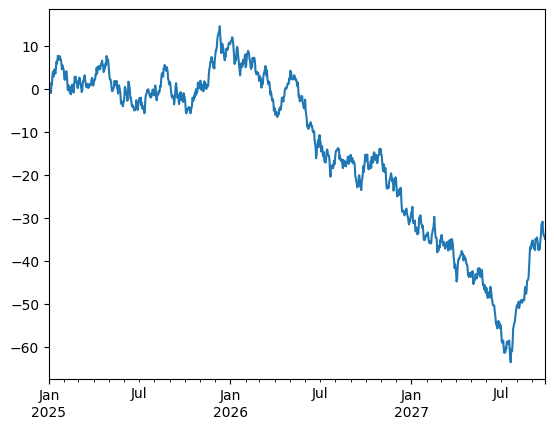

In [82]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot()

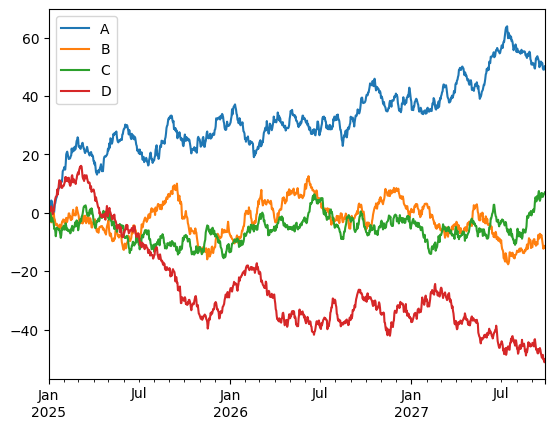

In [83]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
df.plot()
plt.legend(loc="best")
plt.show()

# Data Structure
- Data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.
## Series
- one-dimensional labeld array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively reffered to as the index.
- acts very similarly to a ndarray and is valid argument to most Numpy functions. However, operions such as slicing will also slice the index.
- Like numpy ndarray, all types must be the same. However, pandas extends Numpy type system and add in categorical data and Nullable integer data type.

In [84]:
# from ndarray - index must be same length as data. 
# If no index is passed, one will be created have values [0, ..., len(data) -1]
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.750835
b    1.007143
c   -0.935732
d    1.395364
e   -1.254263
dtype: float64

In [85]:
# use dict to instantiate
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [86]:
# if an index is passed, the values in data corresponding to the labels in the index will be pulled out
d = {"a": 0.0, "b": 1.0, "c": 2.0}
print(pd.Series(d))
print(pd.Series(d, index=["b", "c", "d", "a"]))

a    0.0
b    1.0
c    2.0
dtype: float64
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [87]:
# creation from scalar value
pd.Series(5.0, index=["a", "b", "d", "d", "e"])

a    5.0
b    5.0
d    5.0
d    5.0
e    5.0
dtype: float64

In [88]:
s.iloc[0]

np.float64(-0.7508351191957721)

In [89]:
s.iloc[:3]

a   -0.750835
b    1.007143
c   -0.935732
dtype: float64

In [90]:
s[s > s.median()]

b    1.007143
d    1.395364
dtype: float64

In [91]:
s.iloc[[4, 3, 1]] # return the index that has 4, 3, 1

e   -1.254263
d    1.395364
b    1.007143
dtype: float64

In [92]:
np.exp(s) # opertions on all elements of s

a    0.471972
b    2.737769
c    0.392298
d    4.036444
e    0.285286
dtype: float64

In [93]:
s.dtype

dtype('float64')

In [94]:
s.array # could get the array from a series
# useful for operations without the index

<NumpyExtensionArray>
[np.float64(-0.7508351191957721),  np.float64(1.0071432111942888),
 np.float64(-0.9357322670715271),  np.float64(1.3953641239410899),
 np.float64(-1.2542626432992492)]
Length: 5, dtype: float64

In [95]:
s.to_numpy() # to return a numpy ndarray

array([-0.75083512,  1.00714321, -0.93573227,  1.39536412, -1.25426264])

In [96]:
s["a"] # series is dict-like, could access with their index
# if label is not in the index, then an exception will be raised.

np.float64(-0.7508351191957721)

In [97]:
s["e"] = 12.0
s

a    -0.750835
b     1.007143
c    -0.935732
d     1.395364
e    12.000000
dtype: float64

In [98]:
"e" in s

True

In [99]:
"f" in s

False

In [100]:
s.get("f") # avoid an exception if "f" doesn't not exist

In [101]:
s.get("f", np.nan)

nan

# Vectorized operations and labels alignment with Series
- When working with raw numpy arrays, looping through value-by-value is usually not necessary. The same is true when workign with Series in pandas. Series can also be passed into most Numpy methods expecting an ndarray.

In [102]:
s + s

a    -1.501670
b     2.014286
c    -1.871465
d     2.790728
e    24.000000
dtype: float64

In [103]:
s * 2

a    -1.501670
b     2.014286
c    -1.871465
d     2.790728
e    24.000000
dtype: float64

In [104]:
np.exp(s)

a         0.471972
b         2.737769
c         0.392298
d         4.036444
e    162754.791419
dtype: float64

#### A key difference between Series and ndarray is that operations between Series automatically align the data based on labels. Thus, you can write computations without giving condiseration to whether the Series involved have the same labels.

In [105]:
s.iloc[1:]

b     1.007143
c    -0.935732
d     1.395364
e    12.000000
dtype: float64

In [106]:
s.iloc[:-1]

a   -0.750835
b    1.007143
c   -0.935732
d    1.395364
dtype: float64

In [107]:
s.iloc[1:] + s.iloc[:-1] # same shape but different labels

a         NaN
b    2.014286
c   -1.871465
d    2.790728
e         NaN
dtype: float64

In [108]:
s.iloc[1:] + s.iloc[:-2] # the labels will align automatically

a         NaN
b    2.014286
c   -1.871465
d         NaN
e         NaN
dtype: float64

#### The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing Nan. Being able to write code without doing any explicit data alignment grants immerse freedom and flexibility in interactive data analysis and research. The integerated data alignment features of the pands data structures set pandas apart from the majority of related tools for working with labeled data.

# Name attribute
- Series has name attribute
- can be change with the rename() function

In [109]:
s = pd.Series(np.random.randn(5), name="something")
s.name

'something'

In [110]:
s = s.rename("different")
s.name

'different'

# DataFrame
- 2-dimensional labled data structure with columns of potentially different types. Think like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commmonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy.ndarray
    - A Series
    - Another DataFrame
- Along the data you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index. If the axis labels are not passed, they wil be constructed from the input data based on common sense rules.

In [111]:
# From dict of Series or dicts
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [112]:
pd.DataFrame(d, index=["d", "b", "a"])


,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [113]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [114]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [115]:
df.columns

Index(['one', 'two'], dtype='object')

#### From dict of ndarrays / lists
- all ndarrays must share the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length

In [116]:
d = { "one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


#### From structured or record array
- this case is hanlded identically to a dict of arrays.

#### Note: DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

In [117]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "S10")]) # dtype alias "a" is deprecated use "S" instead
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [118]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [119]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


#### From a list of dicts

In [120]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}] # keys become columns name and values become entry as row
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [121]:
pd.DataFrame(data2, index=["first", "second"]) # passing the index will create an index

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [122]:
pd.DataFrame(data2, columns=["a", "b"]) # padding the columns will only create those columns

,a,b
0,1,2
1,5,10


#### From a dict of tuples
- can automatically create a MultiIndexed frame by passing a tuples dictionary

In [123]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### From a Series
- the result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [124]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


#### From a list of namedtuples
- the field names of the first namedtuples in the list determine the columns of the DataFrame. THe remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the DataFrame. If any of those tuples is shorter than the first namedtuples then the later columns in the corresponding row are marked as missing values. If any are longer than the first namedtuple, a ValueError is raised.

In [125]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [126]:
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)]) # will expand to Point3D and leave z empty for the Point namedtuple

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


#### From a list of dataclasses
- Data classes as instroduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries
- Please be aware, that all values in teh list should be dataclasses, mixing types in the list would result in a TypeError.

In [127]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


#### Missing data
- To construct a DataFrame with missing data, we use np.nan to represent missing values. Alternatively, you may pass a numpy.MaskedArray as the data argument to the DataFrame constructor, and its masked entries will be considered missing

#### Alternative constructors
- DataFrame.from_dict() takes a dict of dicts or a dict of array-like sequences and return a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is "columns" by default, but which can be set to "index" in order to use the dict keys as row labels.

In [128]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [129]:
pd.DataFrame(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])])) # don't really needed the from_dict function

,A,B
0,1,4
1,2,5
2,3,6


In [130]:
# If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:
pd.DataFrame.from_dict(
    dict([("A", [1,2,3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"]
)

,one,two,three
A,1,2,3
B,4,5,6


# Column selection, addition, deletion
- You can treat a DataFrame semantically like a dict of like-indexed Series objects, Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [131]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [132]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [133]:
# columns can be deleted or popped like with a dict:
del df["two"]
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


#### When inserting a scalar value, it will naturally be propagated to fill the column:              


In [134]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


#### When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame's index:

In [135]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


#### You can insert raw ndarrays but their length must match the length of the DataFrame's index.
#### By default, columns get inserted at the end. DataFrame.insert() inserts at a particular location in the columns:

In [136]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains
- Inspired by dplyr's mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns

In [137]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()
# We inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [ ]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()
# assign() always returns a copy of the data, leaving the original DataFrame untouched.

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


- Passing a callable, as opposed to an actual value to be inserted, is useful when you don't have a reference to the DataFrame at hand. This is common when using assign() in a chain of operations. 
- For example, whe can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

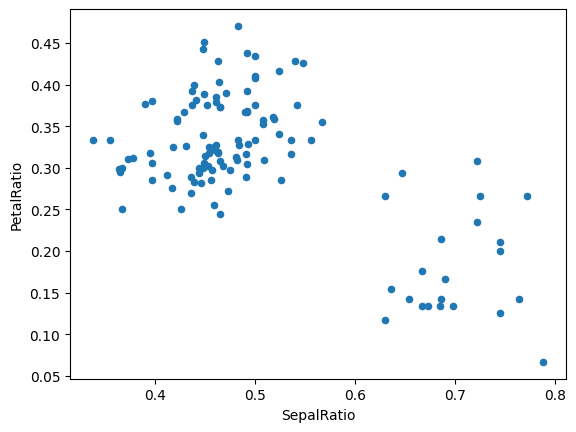

In [140]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

plt.show()

- Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that's been filtered to those rows with sepal length greater than 5. The filtering happens first, then ratio calculations. This is an example where we didn't have a reference tot he filtered DataFrame available.
- The function signature for assign() is simple **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or Numpy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.
- The order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same assign().

In [ ]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# in the second expression, x["C"] will refer to the newly created column, that's equal to dfa["A"] + dfa["B"]
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])


,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


#### Indexing / selection
- The basic of indexing are as follow:

| Operation                         | Syntax              | Result       |
|----------                         | -------             | -----        |
| Select column                     | df[col]             | Series       |
| Select row by label               | df.loc[label]       | Series       |
| Select row by integer location    | df.iloc[loc]        | Series       |
| Slice rows                        | df[1:10]            | DataFrame    |
| Select rows by boolean vector     | df[bool_vec]        | DataFrame    |


In [143]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [144]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

#### Data alignment and arithmetic
- Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [145]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,0.513833,-2.225734,1.974380,NaN
1,-0.199233,-1.664609,-0.322252,NaN
2,1.298628,-0.138628,3.682780,NaN
3,-0.485326,-1.439260,-1.954431,NaN
4,0.840496,-0.027245,-0.656587,NaN
5,0.292965,0.424581,1.569410,NaN
6,2.322354,1.954364,-1.018606,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


- When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. For Example:

In [146]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.015564,-1.588484,-0.153599,0.694121
2,1.240895,0.550960,0.150237,-0.950405
3,0.338100,0.451463,-0.717465,-2.643880
4,-0.516975,-0.166569,-0.565895,-0.059083
5,0.429397,0.863924,-0.170320,-3.558928
6,0.562497,0.768639,-1.555920,-1.240595
7,0.789174,1.062798,-0.501311,-1.859072
8,-0.054766,-0.131685,-1.750628,0.803925
9,0.378828,0.356404,-0.375965,1.628322


- Arithmetic operations with scalars operate element-wise:

In [147]:
df * 5 + 2

,A,B,C,D
0,2.090276,0.067009,8.028138,6.846428
1,7.168094,-7.875412,7.260143,10.317030
2,8.294750,2.821811,8.779323,2.094402
3,3.780776,2.324323,4.440815,-6.372974
4,-0.494597,-0.765835,5.198662,6.551010
5,4.237262,4.386628,7.176536,-10.948214
6,4.902760,3.910203,0.248536,0.643453
7,6.036145,5.381001,5.521585,-2.448934
8,1.816444,-0.591414,-0.725002,10.866053
9,3.984414,1.849029,6.148312,14.988038


In [148]:
1 /df

,A,B,C,D
0,55.385406,-2.586665,0.829444,1.031688
1,0.967475,-0.506308,0.950544,0.601176
2,0.794313,6.084123,0.737537,52.965173
3,2.807765,15.416733,2.048496,-0.597159
4,-2.004332,-1.807772,1.563154,1.098657
5,2.234875,2.095006,0.965897,-0.386154
6,1.722499,2.617523,-2.854755,-3.685828
7,1.238806,1.478852,1.419815,-1.123865
8,-27.239645,-1.929449,-1.834861,0.563949
9,2.519635,-33.118869,1.205310,0.384970


In [149]:
df ** 4

,A,B,C,D
0,1.062719e-07,2.233774e-02,2.112772,8.826873e-01
1,1.141410e+00,1.521741e+01,1.224927,7.655845e+00
2,2.512082e+00,7.298071e-04,3.379600,1.270687e-07
3,1.609004e-02,1.770234e-05,0.056788,7.863918e+00
4,6.196145e-02,9.363216e-02,0.167492,6.863588e-01
5,4.008548e-02,5.191091e-02,1.148886,4.497378e+01
6,1.135964e-01,2.130288e-02,0.015057,5.418258e-03
7,4.246070e-01,2.090745e-01,0.246078,6.268215e-01
8,1.816328e-06,7.215513e-02,0.088224,9.886472e+00
9,2.481128e-02,8.311856e-07,0.473811,4.552964e+01


- Boolean operators operate element-wise as well:

In [150]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [151]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1 ^ df2 # xor operation

,a,b
0,True,True
1,True,False
2,False,True


In [153]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


#### Transposing
- To transpose, access the "T" attribute or DataFrame.transpose(), similar to an ndarray:

In [154]:
# only show the first 5 rows
df[:5].T

,0,1,2,3,4
A,0.018055,1.033619,1.258950,0.356155,-0.498919
B,-0.386598,-1.975082,0.164362,0.064865,-0.553167
C,1.205628,1.052029,1.355865,0.488163,0.639732
D,0.969286,1.663406,0.018880,-1.674595,0.910202


#### DataFrame interoperability with Numpy functions
- Most numpy functions can be called directly on Series and DataFrame

In [155]:
np.exp(df)

,A,B,C,D
0,1.018219,0.679364,3.338854,2.636060
1,2.811221,0.138750,2.863454,5.277255
2,3.521722,1.178641,3.880114,1.019060
3,1.427829,1.067015,1.629320,0.187384
4,0.607186,0.575126,1.895973,2.484825
5,1.564322,1.611758,2.815971,0.075047
6,1.787025,1.465272,0.704482,0.762381
7,2.241688,1.966392,2.022465,0.410743
8,0.963954,0.595542,0.579842,5.889733
9,1.487182,0.970257,2.292544,13.431566


In [156]:
np.asarray(df)

array([[ 0.0180553 , -0.38659816,  1.2056276 ,  0.96928551],
       [ 1.03361883, -1.97508238,  1.05202866,  1.66340606],
       [ 1.25894995,  0.16436223,  1.35586458,  0.01888033],
       [ 0.3561552 ,  0.06486458,  0.48816305, -1.67459482],
       [-0.4989194 , -0.55316699,  0.63973233,  0.91020205],
       [ 0.44745232,  0.47732554,  1.03530728, -2.58964272],
       [ 0.58055196,  0.38204065, -0.35029281, -0.27130945],
       [ 0.80722908,  0.67620019,  0.70431696, -0.88978683],
       [-0.0367112 , -0.5182828 , -0.54500048,  1.77321066],
       [ 0.39688281, -0.03019427,  0.82966232,  2.5976076 ]])

- DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.
- Series implements __array_ufunc__(), which allows it to work with Numpy's universal functions.
- The ufunc is applied to the underlying array in a Series.

In [157]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

- When multiple Series are passed to a ufunc, they are aligned before performing the operation.
- Like other parts of the library, pandas will automatically align labeled inputs as part of the ufunc with multiple inputs. For example, using numpy.remainder() on two pandas.Series with differently ordered labels will align before the operations.

In [ ]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
np.remainder(ser1, ser2)


a    1
b    0
c    3
dtype: int64

In [159]:
# As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

- When a binary ufunc is applied to a Series and Index, the Series implementation takes precedence and a Series is returned.

In [160]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

- Numpy ufuncs are safe to apply to Series backed by non-ndarray arrays, for example arrays.SpareArray. If possible, the ufunc is applied without converting the underlying data to an ndarray.

#### Console display
- A very large DataFrame will be truncated to display them in the consle. You can also get a summary using info().

In [161]:
print(df)

          A         B         C         D
0  0.018055 -0.386598  1.205628  0.969286
1  1.033619 -1.975082  1.052029  1.663406
2  1.258950  0.164362  1.355865  0.018880
3  0.356155  0.064865  0.488163 -1.674595
4 -0.498919 -0.553167  0.639732  0.910202
5  0.447452  0.477326  1.035307 -2.589643
6  0.580552  0.382041 -0.350293 -0.271309
7  0.807229  0.676200  0.704317 -0.889787
8 -0.036711 -0.518283 -0.545000  1.773211
9  0.396883 -0.030194  0.829662  2.597608


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10 non-null     float64
 1   B       10 non-null     float64
 2   C       10 non-null     float64
 3   D       10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes


- However, using DataFrame.to_string() will return a string representation of the DataFrame in tabular form, though it won't always fit the console width:

In [163]:
print(df.to_string())

          A         B         C         D
0  0.018055 -0.386598  1.205628  0.969286
1  1.033619 -1.975082  1.052029  1.663406
2  1.258950  0.164362  1.355865  0.018880
3  0.356155  0.064865  0.488163 -1.674595
4 -0.498919 -0.553167  0.639732  0.910202
5  0.447452  0.477326  1.035307 -2.589643
6  0.580552  0.382041 -0.350293 -0.271309
7  0.807229  0.676200  0.704317 -0.889787
8 -0.036711 -0.518283 -0.545000  1.773211
9  0.396883 -0.030194  0.829662  2.597608


- Wide DataFrames will be printed across multiple rows by default:

In [164]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.615705,1.539416,-2.070189,-0.297260,0.254309,-0.060148,0.784718,-0.385999,1.025438,-0.122082,-0.991926,-2.112608
1,0.702045,0.932579,-0.868737,0.032153,0.392896,-1.227749,0.951782,-1.433993,1.077944,-0.243191,-0.722120,-0.637924
2,-0.189125,1.207923,2.219423,-0.587393,-0.634927,-0.366614,-0.612546,0.348071,0.773710,1.341101,-0.397347,0.873845


In [165]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.004971,0.348334,-0.984780,-0.656848,-0.158754,-0.192493,-2.498522,0.377316,0.207531,-1.291039,-1.079433,-0.307855
1,0.892536,0.582922,-2.170242,-0.838555,0.403506,-0.809010,0.880196,1.218108,1.913380,-0.500969,-1.319901,-1.578117
2,1.462348,-2.447838,-1.596151,1.015178,0.947842,-0.350653,1.455321,-1.096082,-0.680078,0.056380,-0.603272,-1.268734


- You can adjust the max width of the individual columns by setting display.max_colwidth

In [168]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02"
    ],
}
pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [169]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


#### DataFrame column attribute access and IPython completion
- If a DataFrame column label is valid Python variable name, the column can be accessed like an attribute:

In [170]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,0.235988,-0.839411
1,-1.251926,-0.698265
2,-1.542614,-0.759374
3,0.164151,0.341915
4,0.268751,-0.168684


In [171]:
df.foo1

0    0.235988
1   -1.251926
2   -1.542614
3    0.164151
4    0.268751
Name: foo1, dtype: float64